In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.express as px
from ydata_profiling import ProfileReport
import warnings , math
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

warnings.filterwarnings("ignore")
sns.set_palette(palette="mako", n_colors=8)

In [ ]:
df = pd.read_csv("data\mental.csv")
df

Timestamp   Age Primary streaming service  Hours per day  \
0     8/27/2022 19:29:02  18.0                   Spotify            3.0   
1     8/27/2022 19:57:31  63.0                   Pandora            1.5   
2     8/27/2022 21:28:18  18.0                   Spotify            4.0   
3     8/27/2022 21:40:40  61.0             YouTube Music            2.5   
4     8/27/2022 21:54:47  18.0                   Spotify            4.0   
..                   ...   ...                       ...            ...   
731  10/30/2022 14:37:28  17.0                   Spotify            2.0   
732   11/1/2022 22:26:42  18.0                   Spotify            1.0   
733   11/3/2022 23:24:38  19.0   Other streaming service            6.0   
734   11/4/2022 17:31:47  19.0                   Spotify            5.0   
735    11/9/2022 1:55:20  29.0             YouTube Music            2.0   

    While working Instrumentalist Composer         Fav genre Exploratory  \
0             Yes             Yes      Yes             Latin         Yes   
1             Yes              No       No              Rock         Yes   
2              No              No       No  Video game music          No   
3             Yes              No      Yes              Jazz         Yes   
4             Yes              No       No               R&B         Yes   
..            ...             ...      ...               ...         ...   
731           Yes             Yes       No              Rock         Yes   
732           Yes             Yes       No               Pop         Yes   
733           Yes              No      Yes               Rap         Yes   
734           Yes             Yes       No         Classical          No   
735           Yes              No       No           Hip hop         Yes   

    Foreign languages  ...  Frequency [R&B]  Frequency [Rap] Frequency [Rock]  \
0                 Yes  ...        Sometimes  Very frequently            Never   
1                  No  ...        Sometimes           Rarely  Very frequently   
2                 Yes  ...            Never           Rarely           Rarely   
3                 Yes  ...        Sometimes            Never            Never   
4                  No  ...  Very frequently  Very frequently            Never   
..                ...  ...              ...              ...              ...   
731               Yes  ...            Never           Rarely  Very frequently   
732               Yes  ...            Never            Never        Sometimes   
733                No  ...        Sometimes        Sometimes           Rarely   
734                No  ...            Never            Never            Never   
735               Yes  ...  Very frequently  Very frequently  Very frequently   

    Frequency [Video game music] Anxiety Depression Insomnia  OCD  \
0                      Sometimes     3.0        0.0      1.0  0.0   
1                         Rarely     7.0        2.0      2.0  1.0   
2                Very frequently     7.0        7.0     10.0  2.0   
3                          Never     9.0        7.0      3.0  3.0   
4                         Rarely     7.0        2.0      5.0  9.0   
..                           ...     ...        ...      ...  ...   
731                        Never     7.0        6.0      0.0  9.0   
732                    Sometimes     3.0        2.0      2.0  5.0   
733                       Rarely     2.0        2.0      2.0  2.0   
734                    Sometimes     2.0        3.0      2.0  1.0   
735                       Rarely     2.0        2.0      2.0  5.0   

    Music effects    Permissions  
0             NaN  I understand.  
1             NaN  I understand.  
2       No effect  I understand.  
3         Improve  I understand.  
4         Improve  I understand.  
..            ...            ...  
731       Improve  I understand.  
732       Improve  I understand.  
733       Improve  I understand.  
734       Improve  I understand.  
735       Impr

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

Text(0.5, 1.0, 'Count of Missing Values')

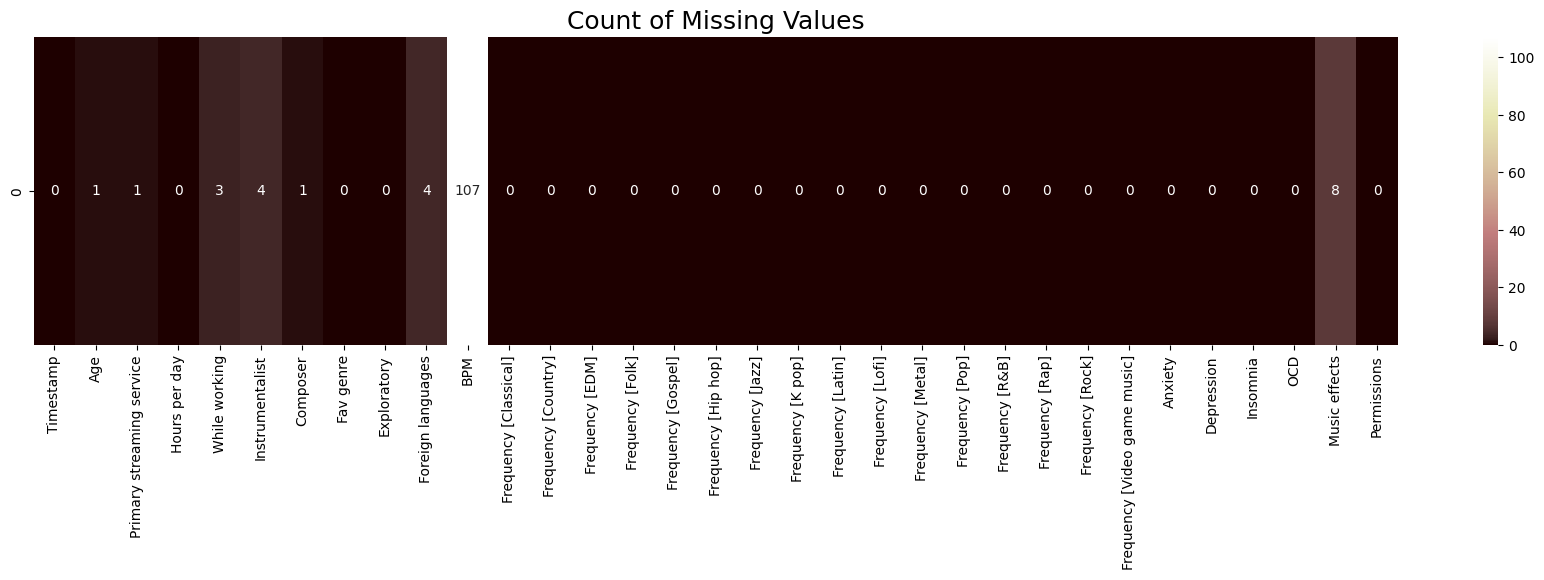

In [4]:
plt.figure(figsize=(22, 4))
sns.heatmap(
    (df.isnull().sum()).to_frame().T, cmap="pink", annot=True, fmt="0.0f"
).set_title("Count of Missing Values", fontsize=18)

In [5]:
df.dropna(
    subset=[
        "Age",
        "Primary streaming service",
        "While working",
        "Instrumentalist",
        "Composer",
        "Foreign languages",
        "Music effects",
    ],
    inplace=True,
)

In [6]:
df[df.columns[df.isnull().any()]].isnull().sum()

BPM    102
dtype: int64

In [7]:
df["BPM"] = df["BPM"].fillna(df["BPM"].median())

In [8]:
df.describe()[1:].T.style.background_gradient(cmap="mako", axis=1).format("{:.2f}")

In [9]:
df.apply(lambda x: x.nunique())

Timestamp                       717
Age                              61
Primary streaming service         6
Hours per day                    26
While working                     2
Instrumentalist                   2
Composer                          2
Fav genre                        16
Exploratory                       2
Foreign languages                 2
BPM                             135
Frequency [Classical]             4
Frequency [Country]               4
Frequency [EDM]                   4
Frequency [Folk]                  4
Frequency [Gospel]                4
Frequency [Hip hop]               4
Frequency [Jazz]                  4
Frequency [K pop]                 4
Frequency [Latin]                 4
Frequency [Lofi]                  4
Frequency [Metal]                 4
Frequency [Pop]                   4
Frequency [R&B]                   4
Frequency [Rap]                   4
Frequency [Rock]                  4
Frequency [Video game music]      4
Anxiety                     

In [10]:
unique = df.nunique()
unique_values = df.apply(lambda x: x.unique())
pd.DataFrame({"Number of Unique Values": unique, "Unique Values": unique_values})

Number of Unique Values  \
Timestamp                                         717   
Age                                                61   
Primary streaming service                           6   
Hours per day                                      26   
While working                                       2   
Instrumentalist                                     2   
Composer                                            2   
Fav genre                                          16   
Exploratory                                         2   
Foreign languages                                   2   
BPM                                               135   
Frequency [Classical]                               4   
Frequency [Country]                                 4   
Frequency [EDM]                                     4   
Frequency [Folk]                                    4   
Frequency [Gospel]                                  4   
Frequency [Hip hop]                                 4   
Frequency [Jazz]                                    4   
Frequency [K pop]                                   4   
Frequency [Latin]                                   4   
Frequency [Lofi]                                    4   
Frequency [Metal]                                   4   
Frequency [Pop]                                     4   
Frequency [R&B]                                     4   
Frequency [Rap]                                     4   
Frequency [Rock]                                    4   
Frequency [Video game music]                        4   
Anxiety                                            12   
Depression                                         12   
Insomnia                                           12   
OCD                                                13   
Music effects                                       3   
Permissions                                         1   

                                                                  Unique Values  
Timestamp                     [8/27/2022 21:28:18, 8/27/2022 21:40:40, 8/27/...  
Age                           [18.0, 61.0, 21.0, 19.0, 17.0, 16.0, 15.0, 14....  
Primary streaming service     [Spotify, YouTube Music, I do not use a stream...  
Hours per day                 [4.0, 2.5, 5.0, 3.0, 1.0, 6.0, 8.0, 2.0, 12.0,...  
While working                                                         [No, Yes]  
Instrumentalist                                                       [No, Yes]  
Composer                                                              [No, Yes]  
Fav genre                     [Video game music, Jazz, R&B, K pop, Rock, Cou...  
Exploratory                                                           [No, Yes]  
Foreign languages                                                     [Yes, No]  
BPM                           [132.0, 84.0, 107.0, 86.0, 66.0, 95.0, 94.0, 1...  
Frequency [Classical]               [Never, Sometimes, Rarely, Very frequently]  
Frequency [Country]                 [Never, Sometimes, Very frequently, Rarely]  
Frequency [EDM]                     [Very frequently, Never, Rarely, Sometimes]  
Frequency [Folk]                    [Never, Rarely, Sometimes, Very frequently]  
Frequency [Gospel]                  [Never, Sometimes, Rarely, Very frequently]  
Frequency [Hip hop]                 [Rarely, Never, Very frequently, Sometimes]  
Frequency [Jazz]                    [Rarely, Very frequently, Never, Sometimes]  
Frequency [K pop]                   [Very frequently, Sometimes, Never, Rarely]  
Frequency [Latin]                   [Never, Very frequently, Sometimes, Rarely]  
Frequency [Lofi]                    [Sometimes, Very frequently, Rarely, Never]  
Frequency [Metal]                   [Sometimes, Never, Rarely, Very frequently]  
Frequency [Pop]                     [Rarely, Sometimes, Very frequently, Never]  
Frequency [R&B]                     [Never, Sometimes, Very frequently, Rarely]  
Frequency [Rap]                     [Rare

In [4]:
ProfileReport(
    df=df,minimal=True,explorative=True,progress_bar=False,
)

100%|██████████| 33/33 [00:00<00:00, 262.46it/s]


In [ ]:
def grab_col_names(df, categorical_threshold=10, cardinal_threshold=20):
    """
    Numerical_cols, categorical_cols, cardinal_cols, Numerical_categorical
    """
    categorical = [col for col in df.columns if df[col].dtype == "O"]
    Numerical_categorical = [
        col
        for col in df.columns
        if df[col].nunique() < categorical_threshold and df[col].dtype != "O"
    ]
    cardinal_cols = [
        col
        for col in df.columns
        if df[col].dtype == "O" and df[col].nunique() > cardinal_threshold
    ]
    categorical_cols = [
        col for col in (categorical + Numerical_categorical) if col not in cardinal_cols
    ]
    Numerical_cols = [
        col
        for col in df.columns
        if df[col].dtype != "O" and col not in Numerical_categorical
    ]
    print(
        f"Numerical_cols : {Numerical_cols} \n categorical_cols : {categorical_cols} \n cardinal_cols : {cardinal_cols} \n  Numerical_categorical : {Numerical_categorical}"
    )
    return Numerical_cols, categorical_cols, cardinal_cols, Numerical_categorical


Numerical_cols, categorical_cols, cardinal_cols, Numerical_categorical = grab_col_names(
    df=df
)

Numerical_cols : ['Age', 'Hours per day', 'BPM', 'Anxiety', 'Depression', 'Insomnia', 'OCD'] 
 categorical_cols : ['Primary streaming service', 'While working', 'Instrumentalist', 'Composer', 'Fav genre', 'Exploratory', 'Foreign languages', 'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]', 'Music effects', 'Permissions'] 
 cardinal_cols : ['Timestamp'] 
 


In [13]:
df[Numerical_cols].corr().T.style.background_gradient(cmap="mako", axis=1).format(
    "{:.3f}"
)

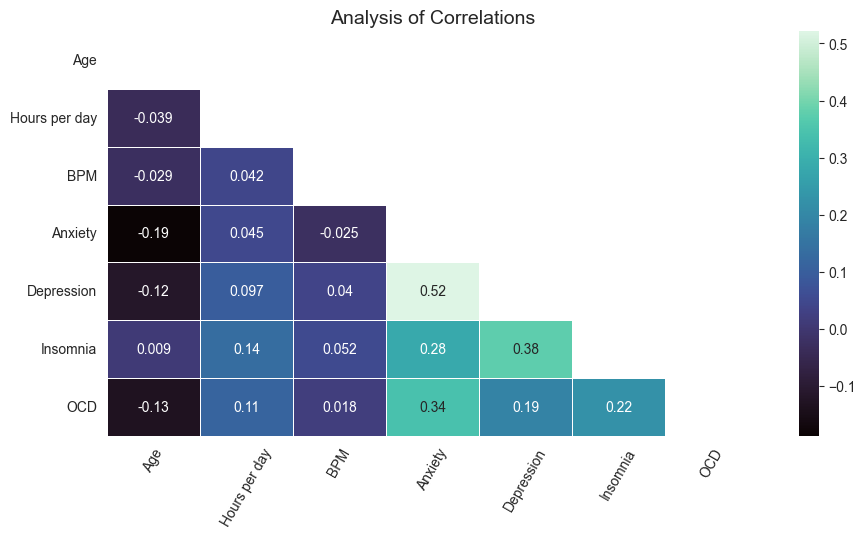

In [ ]:
def correlated_map(data, cmap="YlGn"):
    n_cols = len(data.columns.to_list())
    plt.figure(figsize=(n_cols * 1.5, n_cols * 0.75))
    sns.set_style("white")
    sns.heatmap(
        data.corr(numeric_only=True),
        cmap=cmap,
        annot=True,
        mask=np.triu(data.corr(numeric_only=True)),
        linewidths=0.6,
    )
    plt.title("Analysis of Correlations", size=14)
    plt.xticks(rotation=60, size=10)
    warnings.filterwarnings("ignore")


correlated_map(data=df[Numerical_cols], cmap="mako")

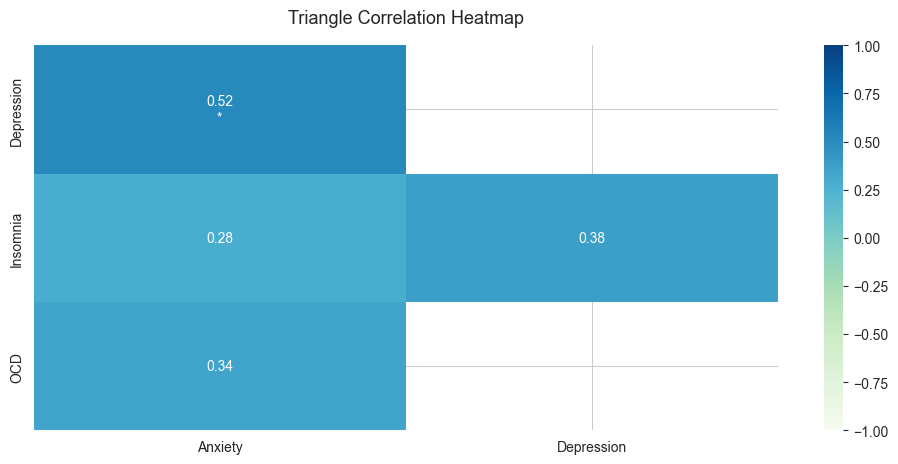

In [ ]:
def triangle_correlation(data):
    corr = data.corr(numeric_only=True)
    mask = np.triu(np.ones_like(corr, dtype=bool))
    mask |= np.abs(corr) < 0.25
    corr = corr[~mask]
    wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
    wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
    corr = corr.iloc[wanted_cols, wanted_rows]
    annot = [
        [
            f"{val:.2f}"
            + ("" if abs(val) < 0.5 else "\n*")
            + ("" if abs(val) < 0.75 else "*")
            + ("" if abs(val) < 0.9 else "*")
            for val in row
        ]
        for row in corr.to_numpy()
    ]

    X = add_constant(data.select_dtypes(include=["int64", "float64"]))
    vif_df = pd.DataFrame()
    vif_df["Feature"] = X.columns
    vif_df["VIF"] = [
        variance_inflation_factor(X.values, i).round(2) for i in range(X.shape[1])
    ]
    vif_df.sort_values(by="VIF", ascending=False, inplace=True)
    vif_df = vif_df.drop(0)

    f, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={"width_ratios": [3, 1]})
    heatmap = sns.heatmap(
        corr, vmin=-1, vmax=1, annot=annot, fmt="", cmap="RdGy", ax=axes[0]
    )
    heatmap.set_title("Triangle Correlation Heatmap", fontdict={"fontsize": 13}, pad=16)

    sns.heatmap(
        vif_df[["VIF"]],
        annot=True,
        cmap="RdGy",
        cbar=True,
        yticklabels=vif_df["Feature"],
        fmt=".2f",
        ax=axes[1],
    )
    axes[1].set_title("VIF values sorted")

    plt.grid()
    plt.tight_layout()
    plt.show()

triangle_correlation(data=df[Numerical_cols])

In [16]:
binary_cols = [col for col in df.columns if df[col].nunique() == 2]
binary_cols

['While working',
 'Instrumentalist',
 'Composer',
 'Exploratory',
 'Foreign languages']

In [17]:
genre_cols = [col for col in df.columns if col.startswith("Frequency")]
genre_cols

['Frequency [Classical]',
 'Frequency [Country]',
 'Frequency [EDM]',
 'Frequency [Folk]',
 'Frequency [Gospel]',
 'Frequency [Hip hop]',
 'Frequency [Jazz]',
 'Frequency [K pop]',
 'Frequency [Latin]',
 'Frequency [Lofi]',
 'Frequency [Metal]',
 'Frequency [Pop]',
 'Frequency [R&B]',
 'Frequency [Rap]',
 'Frequency [Rock]',
 'Frequency [Video game music]']

In [18]:
genre_cols_map = {"Never": 0, "Rarely": 1, "Sometimes": 2, "Very frequently": 3}
binary_cols_map = {"Yes": 1, "No": 0}

df2 = df.copy()
df2[genre_cols] = df2[genre_cols].applymap(lambda x: genre_cols_map.get(x, x))
df2[binary_cols] = df2[binary_cols].applymap(lambda x: binary_cols_map.get(x, x))
df2["Music effects"] = df2["Music effects"].map(
    {"Improve": 1, "No effect": 0, "Worsen": -1}
)

In [19]:
df2

Timestamp   Age Primary streaming service  Hours per day  \
2     8/27/2022 21:28:18  18.0                   Spotify            4.0   
3     8/27/2022 21:40:40  61.0             YouTube Music            2.5   
4     8/27/2022 21:54:47  18.0                   Spotify            4.0   
5     8/27/2022 21:56:50  18.0                   Spotify            5.0   
6     8/27/2022 22:00:29  18.0             YouTube Music            3.0   
..                   ...   ...                       ...            ...   
731  10/30/2022 14:37:28  17.0                   Spotify            2.0   
732   11/1/2022 22:26:42  18.0                   Spotify            1.0   
733   11/3/2022 23:24:38  19.0   Other streaming service            6.0   
734   11/4/2022 17:31:47  19.0                   Spotify            5.0   
735    11/9/2022 1:55:20  29.0             YouTube Music            2.0   

     While working  Instrumentalist  Composer         Fav genre  Exploratory  \
2                0                0         0  Video game music            0   
3                1                0         1              Jazz            1   
4                1                0         0               R&B            1   
5                1                1         1              Jazz            1   
6                1                1         0  Video game music            1   
..             ...              ...       ...               ...          ...   
731              1                1         0              Rock            1   
732              1                1         0               Pop            1   
733              1                0         1               Rap            1   
734              1                1         0         Classical            0   
735              1                0         0           Hip hop            1   

     Foreign languages  ...  Frequency [R&B]  Frequency [Rap]  \
2                    1  ...                0                1   
3                    1  ...                2                0   
4                    0  ...                3                3   
5                    1  ...                3                3   
6                    1  ...                1                0   
..                 ...  ...              ...              ...   
731                  1  ...                0                1   
732                  1  ...                0                0   
733                  0  ...                2                2   
734                  0  ...                0                0   
735                  1  ...                3                3   

     Frequency [Rock]  Frequency [Video game music]  Anxiety  Depression  \
2                   1                             3      7.0         7.0   
3                   0                             0      9.0         7.0   
4                   0                             1      7.0         2.0   
5                   3                             0      8.0         8.0   
6                   0                             2      4.0         8.0   
..                ...                           ...      ...         ...   
731                 3                             0      7.0         6.0   
732                 2                             2      3.0         2.0   
733                 1                             1      2.0         2.0   
734                 0                             2      2.0         3.0   
735                 3                             1      2.0         2.0   

     Insomnia  OCD  Music effects    Permissions  
2        10.0  2.0              0  I understand.  
3         3.0  3.0              1  I understand.  
4         5.0  9.0              1  I understand.  
5         7.0  7.0              1  I understand.  
6         6.0  0.0              1  I understand.  
..        ...  ...            ...            ...  
731       0.0  9.0              1  I understand.  
732       2.0  5.0              1  I understand.  


In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 718 entries, 2 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     718 non-null    object 
 1   Age                           718 non-null    float64
 2   Primary streaming service     718 non-null    object 
 3   Hours per day                 718 non-null    float64
 4   While working                 718 non-null    int64  
 5   Instrumentalist               718 non-null    int64  
 6   Composer                      718 non-null    int64  
 7   Fav genre                     718 non-null    object 
 8   Exploratory                   718 non-null    int64  
 9   Foreign languages             718 non-null    int64  
 10  BPM                           718 non-null    float64
 11  Frequency [Classical]         718 non-null    int64  
 12  Frequency [Country]           718 non-null    int64  
 13  Frequency 

In [21]:
df2['Frequency [K pop]'].dtype

dtype('int64')

In [ ]:
df2.drop(columns=["Permissions", "Timestamp"], axis=1,inplace=True)
Numerical_cols, categorical_cols, cardinal_cols,Numerical_categorical = grab_col_names(df=df2)
Numerical_categorical_cols = [
    col for col in df2.columns if df2[col].dtype == np.int64 and df2[col].nunique() < 5
]
Numerical_categorical_cols

Numerical_cols : ['Age', 'Hours per day', 'BPM', 'Anxiety', 'Depression', 'Insomnia', 'OCD'] 
 categorical_cols : ['Primary streaming service', 'Fav genre', 'While working', 'Instrumentalist', 'Composer', 'Exploratory', 'Foreign languages', 'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]', 'Music effects'] 
 cardinal_cols : [] 
 


['While working',
 'Instrumentalist',
 'Composer',
 'Exploratory',
 'Foreign languages',
 'Frequency [Classical]',
 'Frequency [Country]',
 'Frequency [EDM]',
 'Frequency [Folk]',
 'Frequency [Gospel]',
 'Frequency [Hip hop]',
 'Frequency [Jazz]',
 'Frequency [K pop]',
 'Frequency [Latin]',
 'Frequency [Lofi]',
 'Frequency [Metal]',
 'Frequency [Pop]',
 'Frequency [R&B]',
 'Frequency [Rap]',
 'Frequency [Rock]',
 'Frequency [Video game music]',
 'Music effects']

In [23]:
corr = df2[Numerical_cols + Numerical_categorical_cols].corr()
mask = np.triu(np.ones(corr.shape), k=1).astype(bool)
corr_masked = corr.mask(mask)

fig = px.imshow(corr_masked, color_continuous_scale="Purples")
fig.update_layout(height=1000, xaxis=dict(tickangle=-45))
fig.show()

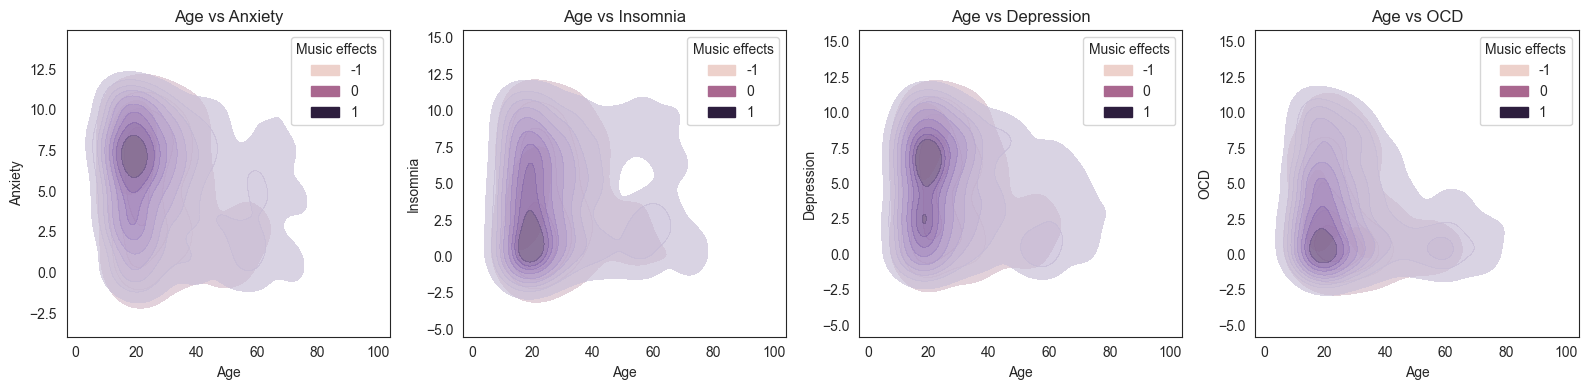

In [ ]:
compartive_columns = [
    ("Age", "Anxiety"),
    ("Age", "Insomnia"),
    ("Age", "Depression"),
    ("Age", "OCD"),
]


def KDE_2D_plotter(compartive_columns: list, data, hue):
    n_cols = len(compartive_columns)
    n_rows = math.ceil(n_cols / 4)
    fig, axes = plt.subplots(
        1, len(compartive_columns), figsize=(n_cols * 4, n_rows * 4)
    )

    if len(compartive_columns) == 1:
        axes = [axes]

    for i, (x, y) in enumerate(compartive_columns):
        sns.kdeplot(
            data=data,
            x=x,
            y=y,
            hue=hue,
            fill=True,
            alpha=0.7,
            ax=axes[i],
            multiple="fill",
        )
        axes[i].set_title(f"{x} vs {y}")
        axes[i].set_xlabel(x)
        axes[i].set_ylabel(y)

    plt.tight_layout()
    plt.show()


KDE_2D_plotter(compartive_columns=compartive_columns, data=df2, hue="Music effects")

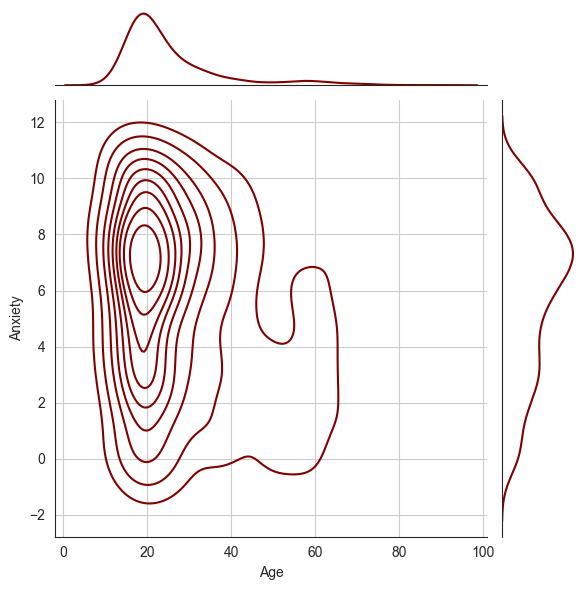

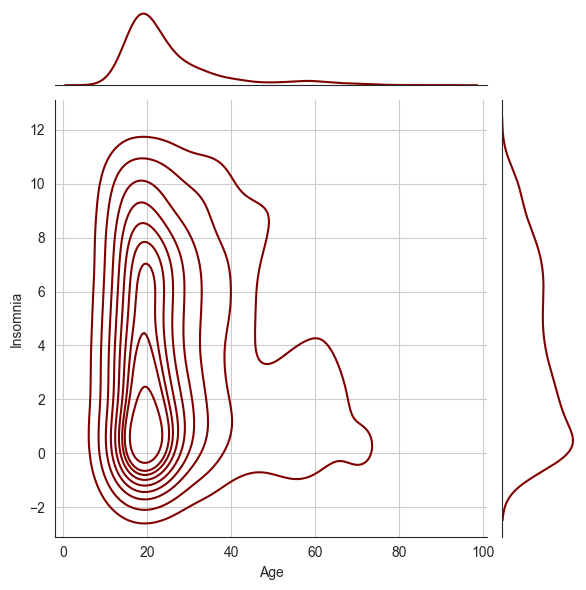

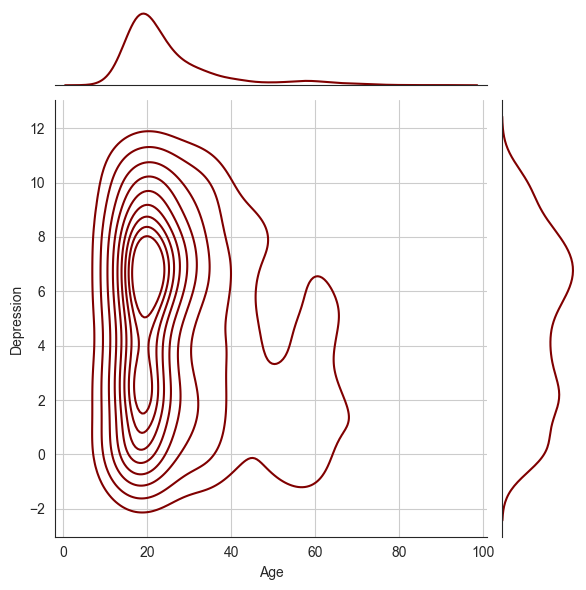

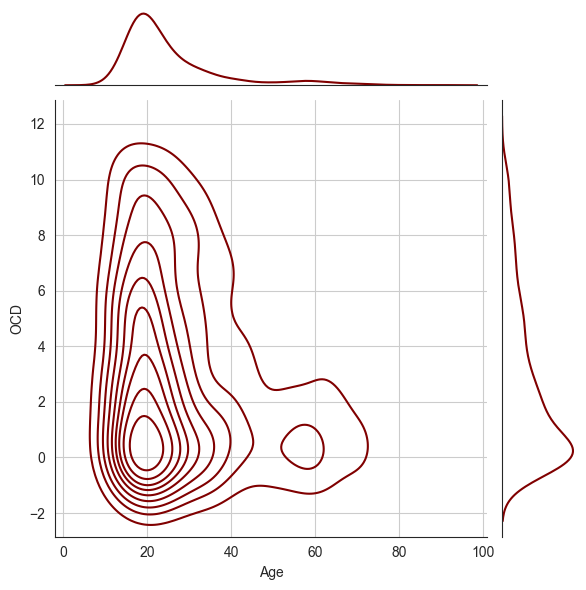

In [ ]:
joint_params = [
    ("Age", "Anxiety"),
    ("Age", "Insomnia"),
    ("Age", "Depression"),
    ("Age", "OCD"),
]


def joint_plotter(df, joint_params):
    for x, y in joint_params:
        sns.jointplot(data=df, x=x, y=y, color="maroon", kind="kde")
        plt.grid()
    plt.show()


joint_plotter(df=df2, joint_params=joint_params)

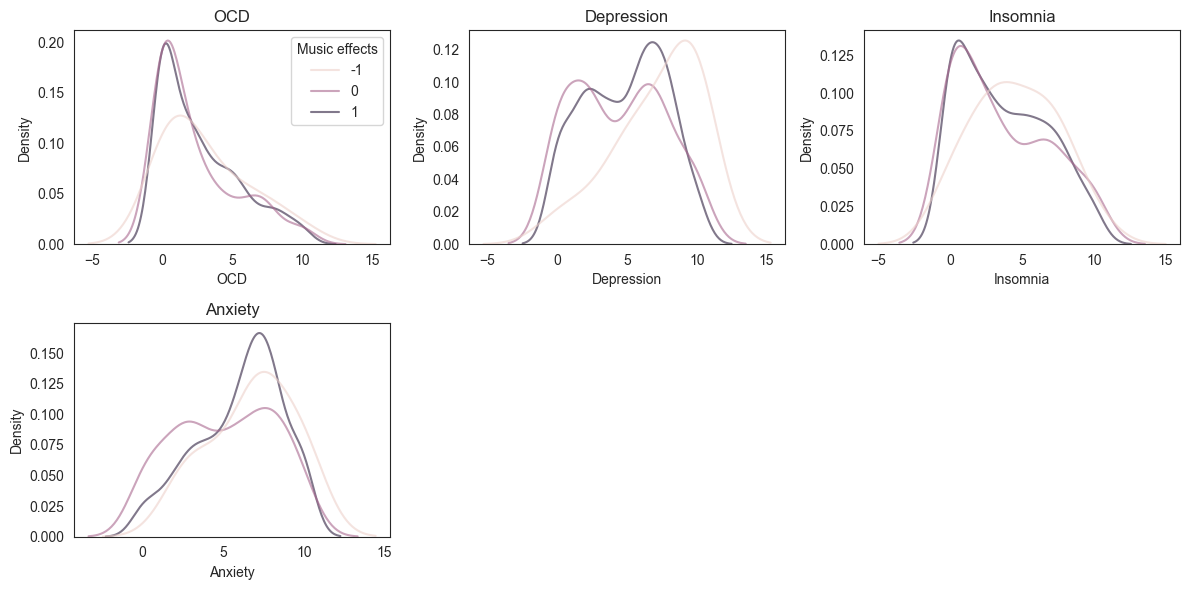

In [ ]:
def KDE_hue_plotter(data, hue, cols: list):
    sns.set_style("white")

    n_cols = 3
    n_plots = len(cols)
    n_rows = math.ceil(n_plots / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))
    axes = axes.flatten()

    for i, col in enumerate(cols):
        ax = axes[i]

        sns.kdeplot(
            data=data,
            x=col,
            hue=hue,
            fill=False,
            common_norm=False,
            alpha=0.6,
            ax=ax,
            legend=False if i != 0 else True,
        )

        ax.set_title(f"{col}", fontsize=12)
        ax.set_xlabel(col)
        ax.set_ylabel("Density")

    for j in range(len(cols), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


KDE_hue_plotter(
    data=df2, hue="Music effects", cols=["OCD", "Depression", "Insomnia", "Anxiety"]
)

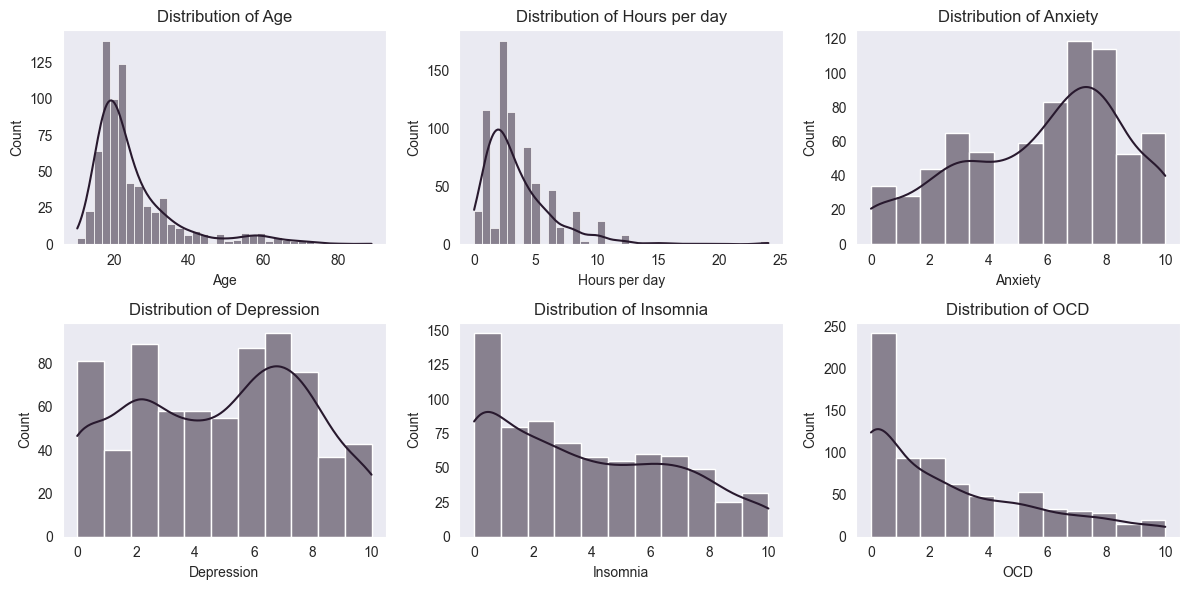

In [ ]:
def plot_hist_kde(df, columns: list, exclude=None, multiple: str = "layer", hue=None):
    columns = [col for col in columns if col != exclude]

    n_cols = 3
    num_plots = len(columns)
    n_rows = math.ceil(num_plots / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))
    axes = axes.flatten()

    if isinstance(hue, str):
        for i, col in enumerate(columns):
            sns.histplot(
                data=df,
                x=col,
                kde=True,
                ax=axes[i],
                multiple=multiple,
                hue=hue,
                palette=sns.color_palette("tab20"),
            )
            axes[i].set_title(f"Distribution of {col}")
    else:
        for i, col in enumerate(columns):
            sns.histplot(
                x=df[col],
                kde=True,
                ax=axes[i],
                multiple=multiple,
                palette=sns.color_palette("tab20"),
            )
            axes[i].set_title(f"Distribution of {col}")

    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()


plot_hist_kde(df=df2, columns=Numerical_cols, exceptions="BPM")

In [28]:
df2[Numerical_cols].skew(axis=0,skipna=True).sort_values(ascending=False)

BPM              26.795522
Hours per day     2.550819
Age               2.135697
OCD               0.963606
Insomnia          0.415499
Depression       -0.059075
Anxiety          -0.426211
dtype: float64

In [29]:
anx = df2.query("`Hours per day` < 12")["Anxiety"].mean()
dep = df2.query("`Hours per day` < 12")["Depression"].mean()
ins = df2.query("`Hours per day` < 12")["Insomnia"].mean()
ocd = df2.query("`Hours per day` < 12")["OCD"].mean()
print(
    "\033[96m Rating Averages by Mental Condition (Up to 12 hours listening to music):"
)
print(f"\033[0mAnxiety: {round(anx, 1)}")
print(f"Depression: {round(dep, 1)}")
print(f"Insomnia: {round(ins, 1)}")
print(f"OCD: {round(ocd, 1)}")

 Rating Averages by Mental Condition (Up to 12 hours listening to music):
Anxiety: 5.8
Depression: 4.8
Insomnia: 3.7
OCD: 2.6


In [30]:
outre3 = df.query('Age > 70')
outre3

Timestamp   Age          Primary streaming service  \
428  8/30/2022 17:43:36  72.0                            Spotify   
429  8/30/2022 18:15:39  73.0                            Pandora   
490   9/1/2022 19:44:33  71.0  I do not use a streaming service.   
494   9/1/2022 21:07:33  74.0  I do not use a streaming service.   
527   9/2/2022 14:09:04  80.0  I do not use a streaming service.   
695  9/28/2022 17:25:48  89.0                            Spotify   

     Hours per day While working Instrumentalist Composer  Fav genre  \
428           6.00           Yes             Yes      Yes       Rock   
429           3.00           Yes              No       No        R&B   
490           0.25           Yes              No       No     Gospel   
494           1.00            No              No       No        Pop   
527           3.00           Yes             Yes       No  Classical   
695          24.00           Yes             Yes      Yes        Rap   

    Exploratory Foreign languages  ...  Frequency [R&B]  Frequency [Rap]  \
428          No                No  ...  Very frequently            Never   
429         Yes               Yes  ...  Very frequently        Sometimes   
490          No               Yes  ...           Rarely            Never   
494          No                No  ...        Sometimes            Never   
527          No                No  ...            Never            Never   
695          No                No  ...        Sometimes  Very frequently   

    Frequency [Rock] Frequency [Video game music] Anxiety Depression Insomnia  \
428  Very frequently                        Never     0.0        1.0      0.0   
429        Sometimes                        Never     5.0        4.0      0.0   
490           Rarely                        Never     1.0        0.0      0.0   
494        Sometimes                        Never     4.0        2.0      1.0   
527            Never                    Sometimes     7.0        3.0      9.0   
695           Rarely                        Never     0.0        0.0      0.0   

     OCD Music effects    Permissions  
428  2.0       Improve  I understand.  
429  1.0       Improve  I understand.  
490  0.0       Improve  I understand.  
494  0.0       Improve  I understand.  
527  2.0       Improve  I understand.  
695  0.0     No effect  I understand.  

[6 rows x 33 columns]

In [31]:
df3 = df2.copy()
df3 = df3.rename(
    columns={
        "Frequency [Classical]": "Classical",
        "Frequency [Country]": "Country",
        "Frequency [EDM]": "EDM",
        "Frequency [Folk]": "Folk",
        "Frequency [Gospel]": "Gospel",
        "Frequency [Hip hop]": "Hip hop",
        "Frequency [Jazz]": "Jazz",
        "Frequency [K pop]": "K pop",
        "Frequency [Latin]": "Latin",
        "Frequency [Lofi]": "Lofi",
        "Frequency [Metal]": "Metal",
        "Frequency [Pop]": "Pop",
        "Frequency [R&B]": "R&B",
        "Frequency [Rap]": "Rap",
        "Frequency [Rock]": "Rock",
        "Frequency [Video game music]": "Games music",
    }
)

In [32]:
df3

Age Primary streaming service  Hours per day  While working  \
2    18.0                   Spotify            4.0              0   
3    61.0             YouTube Music            2.5              1   
4    18.0                   Spotify            4.0              1   
5    18.0                   Spotify            5.0              1   
6    18.0             YouTube Music            3.0              1   
..    ...                       ...            ...            ...   
731  17.0                   Spotify            2.0              1   
732  18.0                   Spotify            1.0              1   
733  19.0   Other streaming service            6.0              1   
734  19.0                   Spotify            5.0              1   
735  29.0             YouTube Music            2.0              1   

     Instrumentalist  Composer         Fav genre  Exploratory  \
2                  0         0  Video game music            0   
3                  0         1              Jazz            1   
4                  0         0               R&B            1   
5                  1         1              Jazz            1   
6                  1         0  Video game music            1   
..               ...       ...               ...          ...   
731                1         0              Rock            1   
732                1         0               Pop            1   
733                0         1               Rap            1   
734                1         0         Classical            0   
735                0         0           Hip hop            1   

     Foreign languages    BPM  ...  Pop  R&B  Rap  Rock  Games music  Anxiety  \
2                    1  132.0  ...    1    0    1     1            3      7.0   
3                    1   84.0  ...    2    2    0     0            0      9.0   
4                    0  107.0  ...    2    3    3     0            1      7.0   
5                    1   86.0  ...    3    3    3     3            0      8.0   
6                    1   66.0  ...    1    1    0     0            2      4.0   
..                 ...    ...  ...  ...  ...  ...   ...          ...      ...   
731                  1  120.0  ...    3    0    1     3            0      7.0   
732                  1  160.0  ...    3    0    0     2            2      3.0   
733                  0  120.0  ...    2    2    2     1            1      2.0   
734                  0  170.0  ...    0    0    0     0            2      2.0   
735                  1   98.0  ...    2    3    3     3            1      2.0   

     Depression  Insomnia  OCD  Music effects  
2           7.0      10.0  2.0              0  
3           7.0       3.0  3.0              1  
4           2.0       5.0  9.0              1  
5           8.0       7.0  7.0              1  
6           8.0       6.0  0.0              1  
..          ...       ...  ...            ...  
731         6.0       0.0  9.0              1  
732         2.0       2.0  5.0              1  
733         2.0       2.0  2.0              1  
734         3.0       2.0  1.0              1  
735         2.0       2.0  5.0              1  

[718 rows x 31 columns]

In [ ]:
Numerical_cols, categorical_cols, cardinal_cols, Numerical_categorical = grab_col_names(df=df3)

Numerical_cols : ['Age', 'Hours per day', 'BPM', 'Anxiety', 'Depression', 'Insomnia', 'OCD'] 
 categorical_cols : ['Primary streaming service', 'Fav genre', 'While working', 'Instrumentalist', 'Composer', 'Exploratory', 'Foreign languages', 'Classical', 'Country', 'EDM', 'Folk', 'Gospel', 'Hip hop', 'Jazz', 'K pop', 'Latin', 'Lofi', 'Metal', 'Pop', 'R&B', 'Rap', 'Rock', 'Games music', 'Music effects'] 
 cardinal_cols : [] 
 


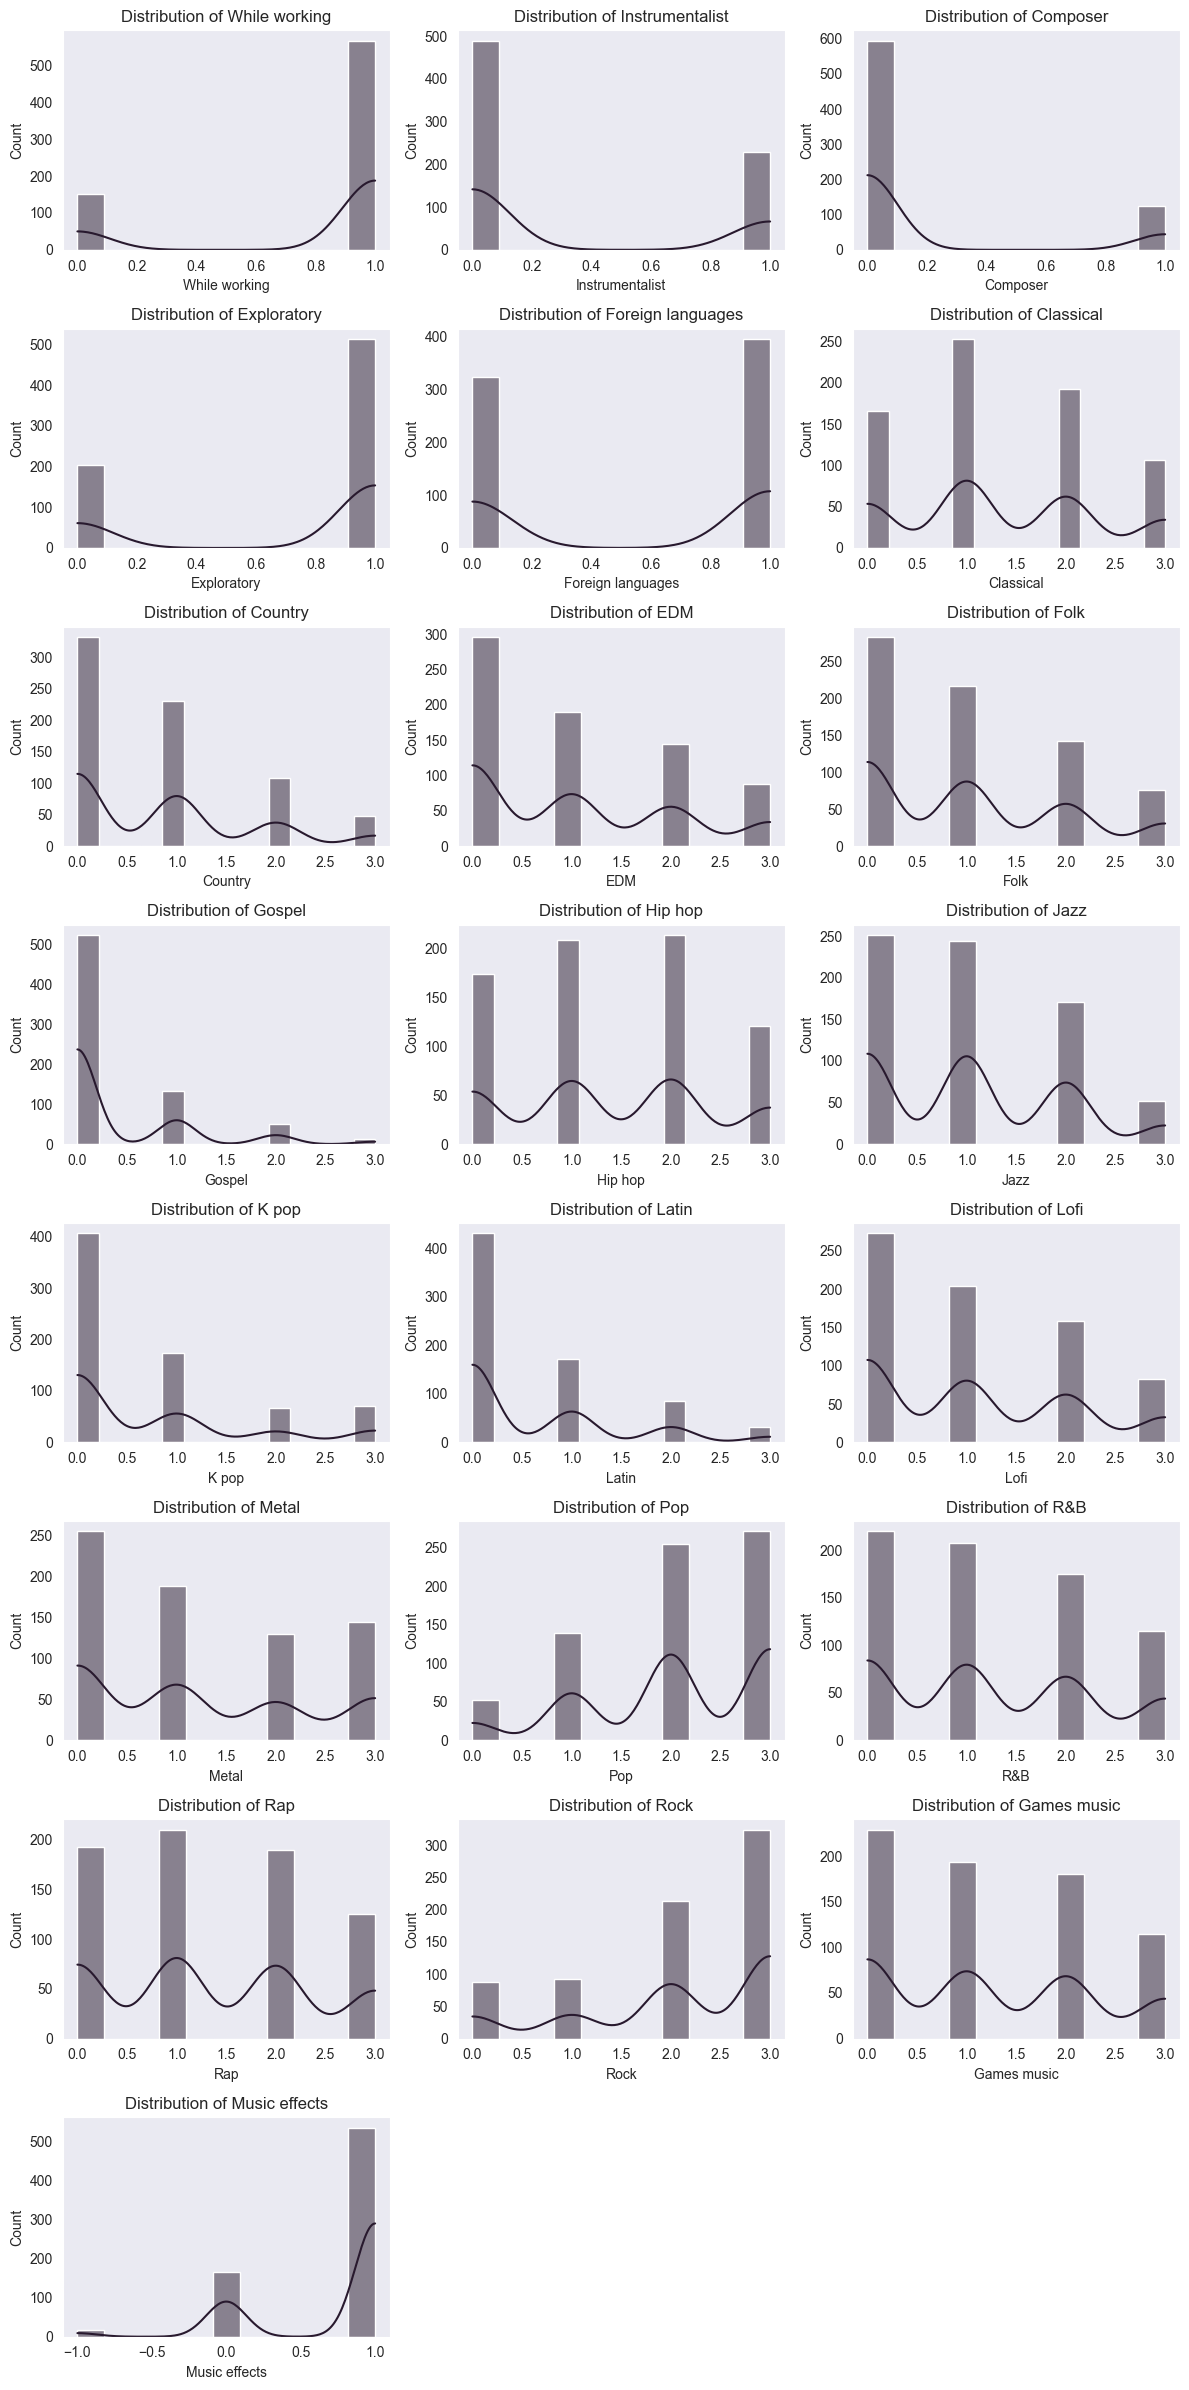

In [ ]:
plot_hist_kde(df=df3,columns=Numerical_categorical,exceptions='BPM')

In [35]:
df3["Age group"] = pd.cut(
    x=df3["Age"], bins=[9, 19, 59, 100], labels=["Teenager", "Adults", "Seniors"]
)
df3["Age group"].value_counts()

Age group
Adults      402
Teenager    291
Seniors      25
Name: count, dtype: int64

In [36]:
stream = (
    df3.groupby("Age group")["Primary streaming service"]
    .agg(["value_counts"])
    .reset_index()
    .rename(columns={"value_counts": "Quantity"})
)
stream

Age group          Primary streaming service  Quantity
0   Teenager                            Spotify       208
1   Teenager                      YouTube Music        28
2   Teenager                        Apple Music        22
3   Teenager            Other streaming service        17
4   Teenager  I do not use a streaming service.        15
5   Teenager                            Pandora         1
6     Adults                            Spotify       237
7     Adults                      YouTube Music        57
8     Adults  I do not use a streaming service.        49
9     Adults            Other streaming service        29
10    Adults                        Apple Music        26
11    Adults                            Pandora         4
12   Seniors  I do not use a streaming service.         5
13   Seniors                            Pandora         5
14   Seniors                            Spotify         5
15   Seniors                      YouTube Music         5
16   Seniors            Other streaming service         3
17   Seniors                        Apple Music         2

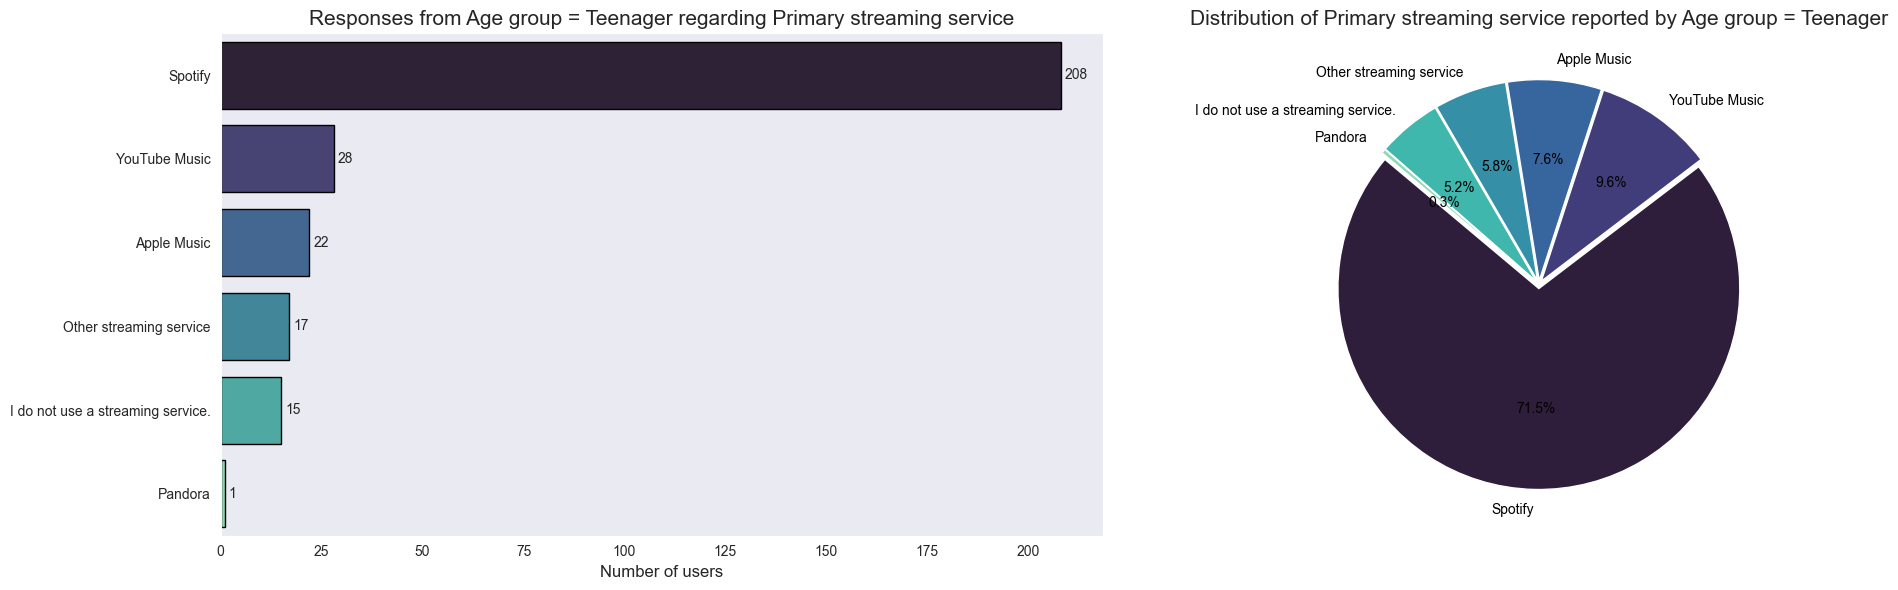

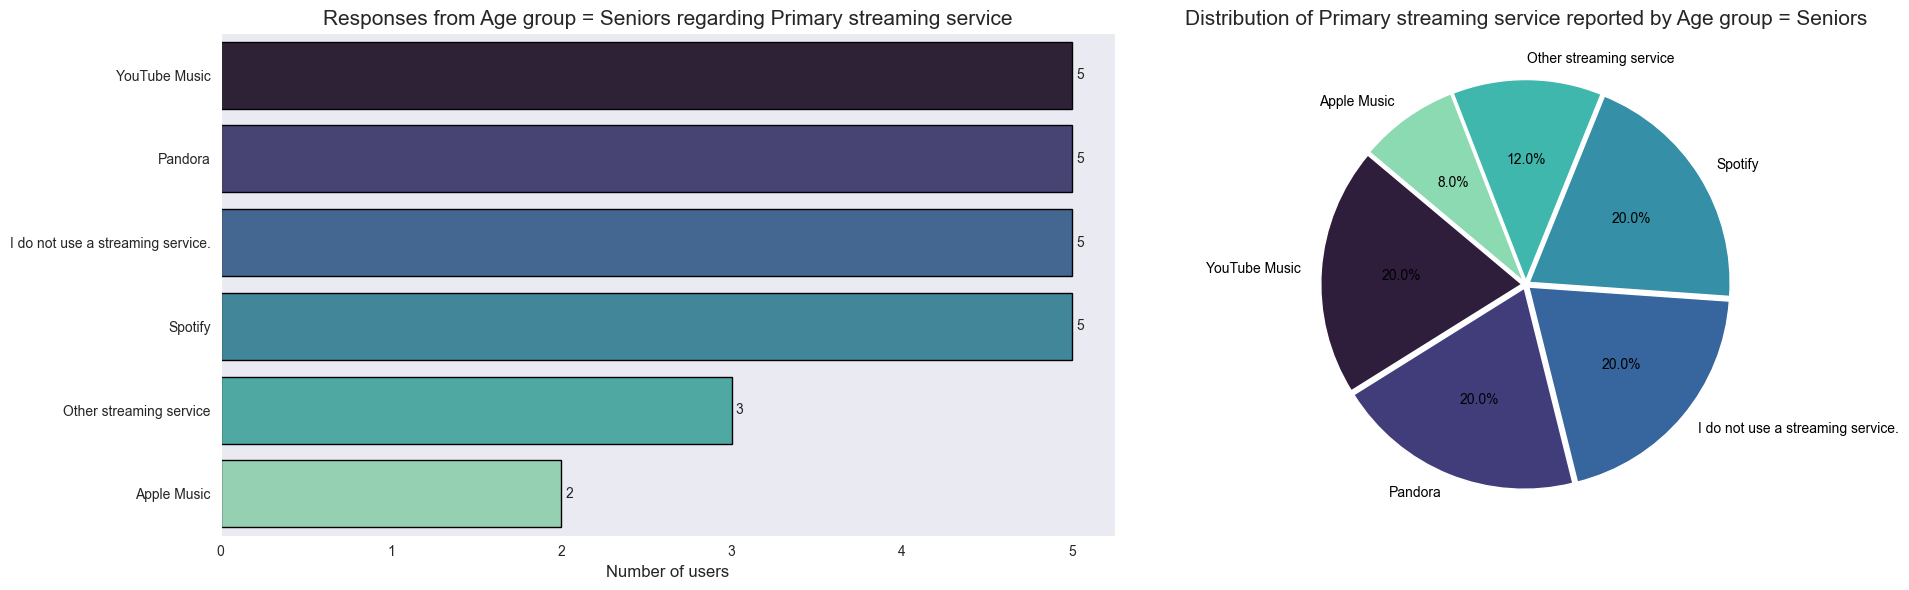

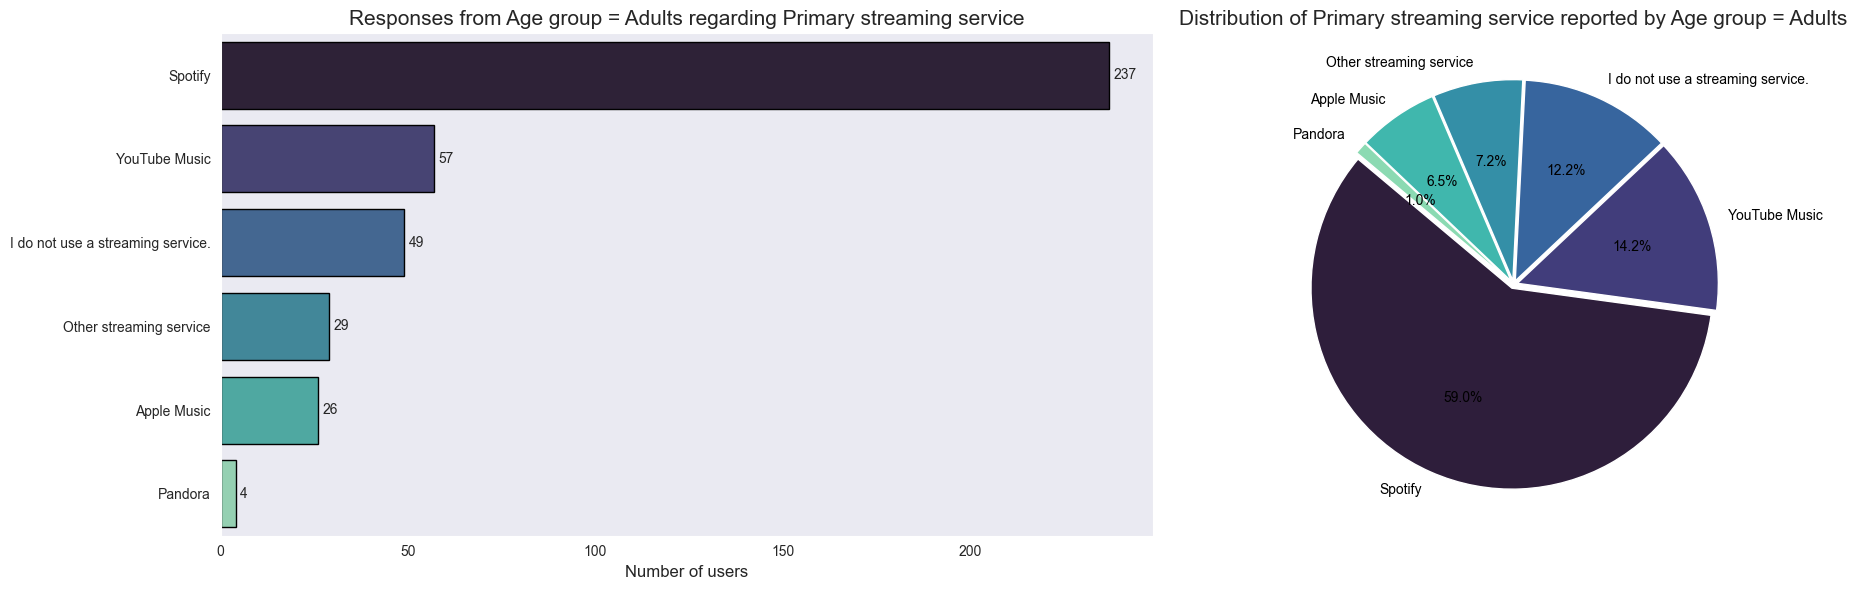

In [ ]:
def feature_analyzer(data, feature: str, hue: str, palette="mako"):
    feature_values = data[feature].dropna().unique().tolist()

    for value in feature_values:
        value_df = data[data[feature] == value]
        counts = value_df[hue].value_counts()

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

        sns.barplot(
            x=counts.values, y=counts.index, palette=palette, edgecolor="black", ax=ax1
        )
        for container in ax1.containers:
            ax1.bar_label(container, padding=3)

        ax1.set_title(
            f"Responses from {feature} = {value} regarding {hue}", fontsize=15
        )
        ax1.set_xlabel("Number of users", fontsize=12)
        ax1.set_ylabel("")

        quantity = counts.values
        services = counts.index

        explode = [0.02] * len(quantity)

        wedges, texts, autotexts = ax2.pie(
            quantity,
            labels=services,
            autopct="%1.1f%%",
            colors=sns.color_palette(palette),
            explode=explode,
            startangle=140,
        )
        ax2.set_title(
            f"Distribution of {hue} reported by {feature} = {value}", fontsize=15
        )

        for text in texts + autotexts:
            text.set_color("black")

        plt.tight_layout()
        plt.show()


feature_analyzer(df3, feature="Age group", hue="Primary streaming service")

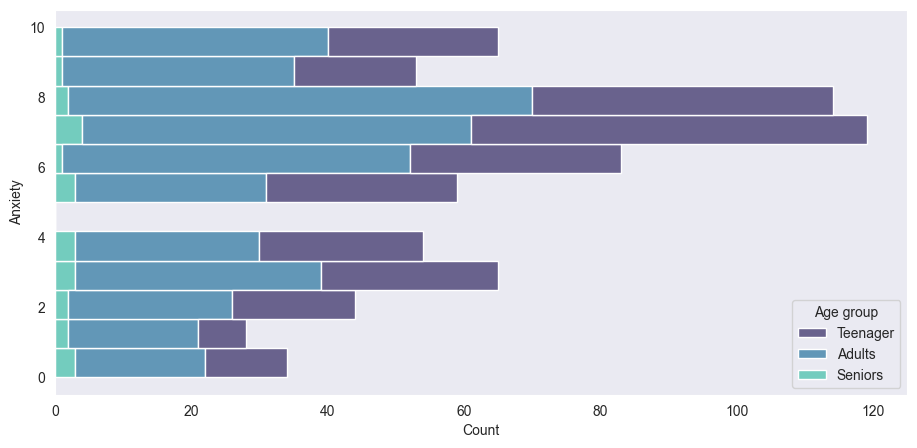

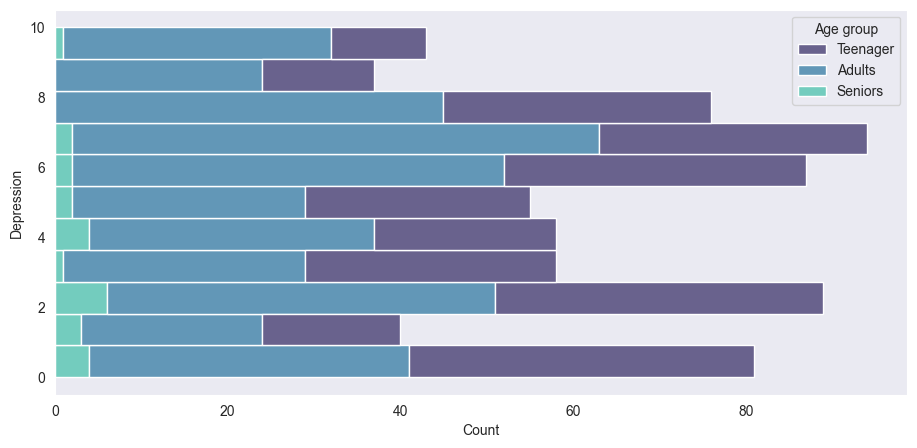

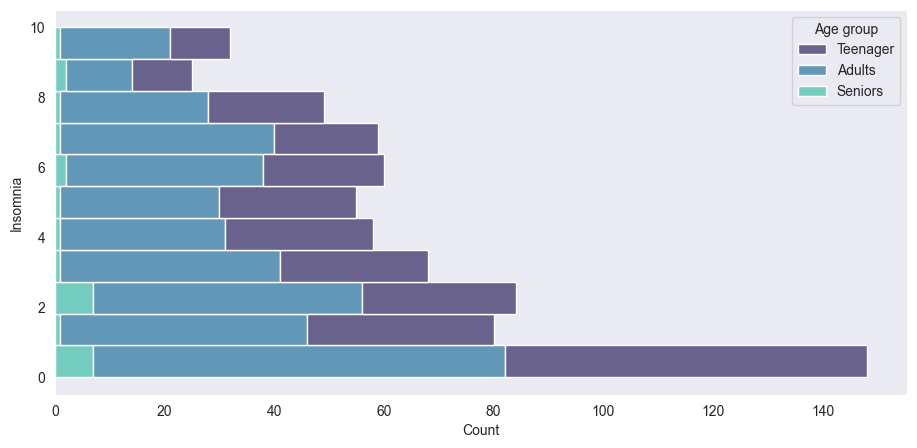

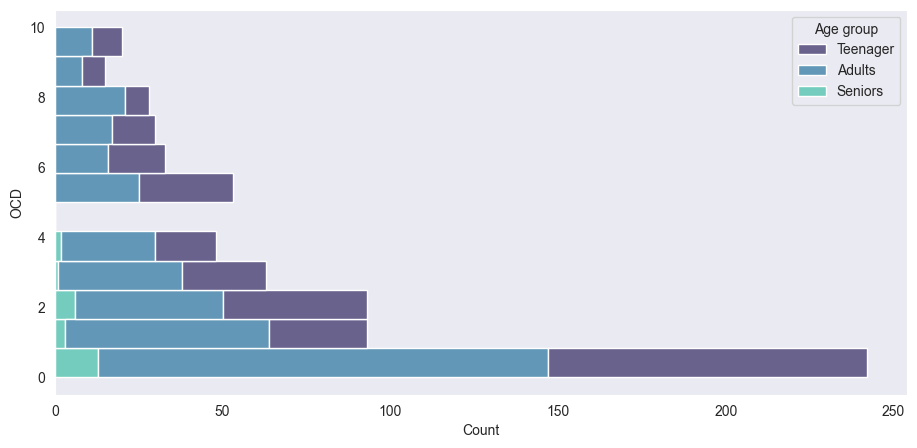

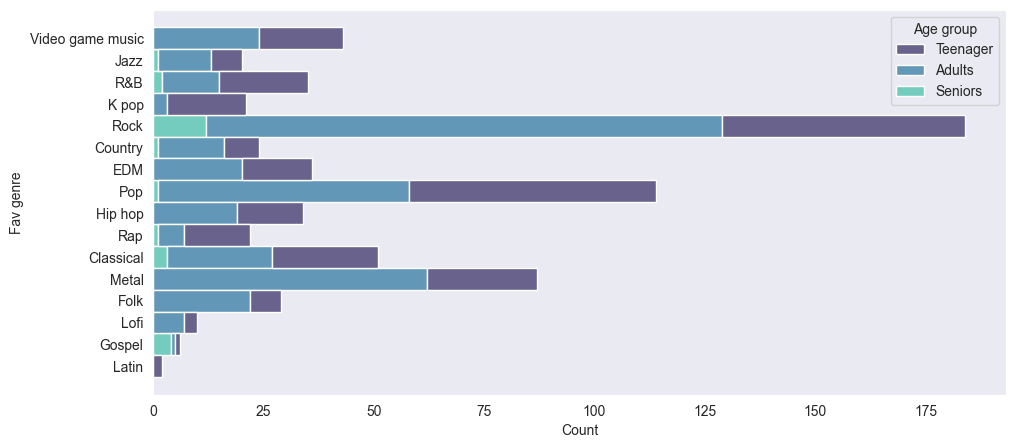

In [ ]:
groups = ["Anxiety", "Depression", "Insomnia", "OCD", "Fav genre"]
for y in groups:
    plt.figure(figsize=(11,5))
    sns.histplot(df3, y=y, palette="mako", hue="Age group", multiple="stack")
    plt.show()

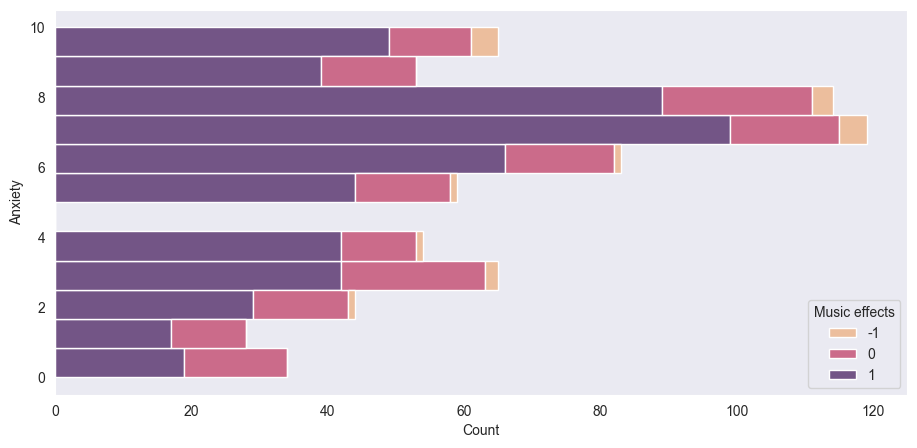

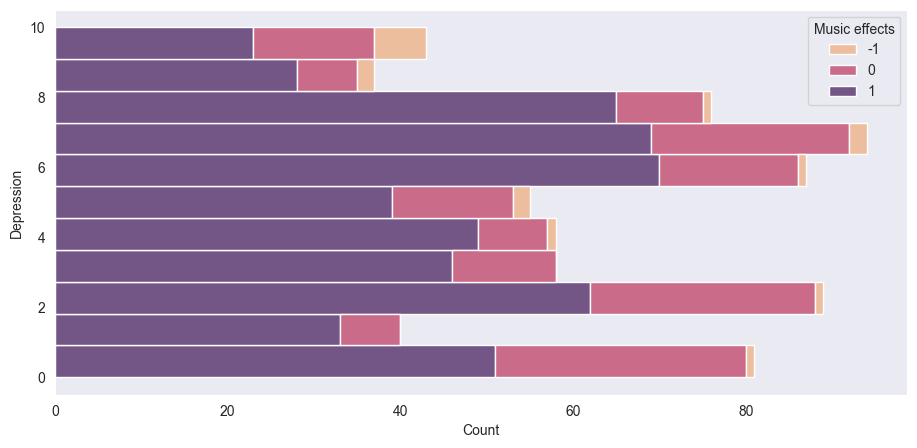

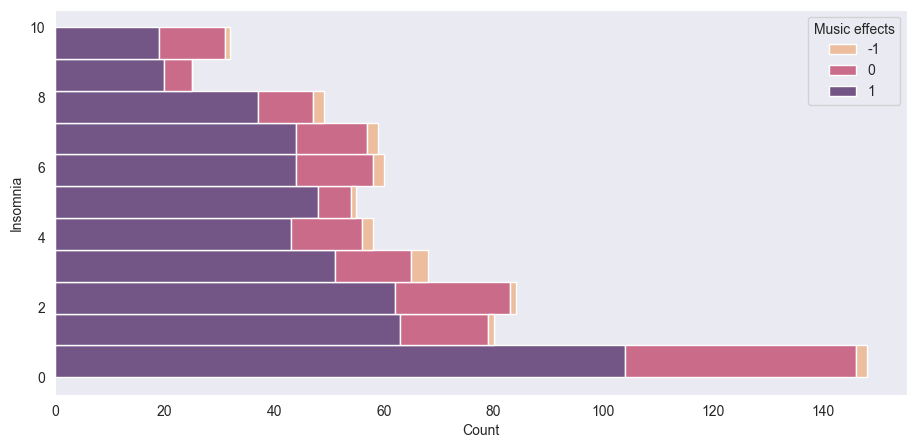

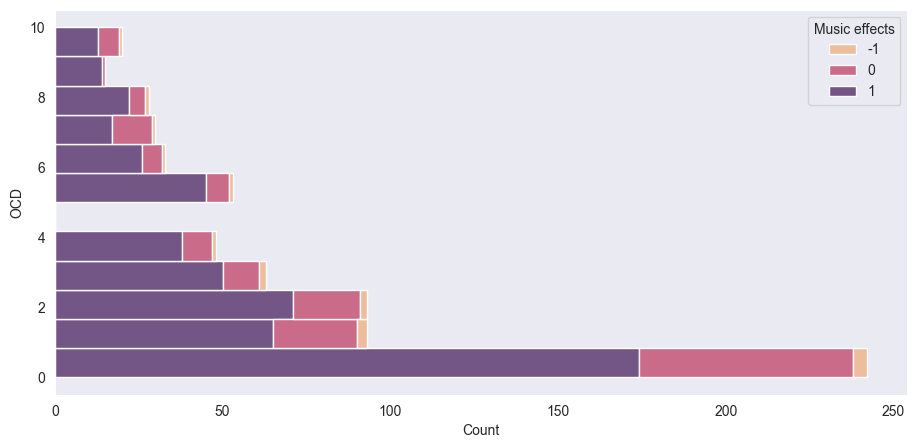

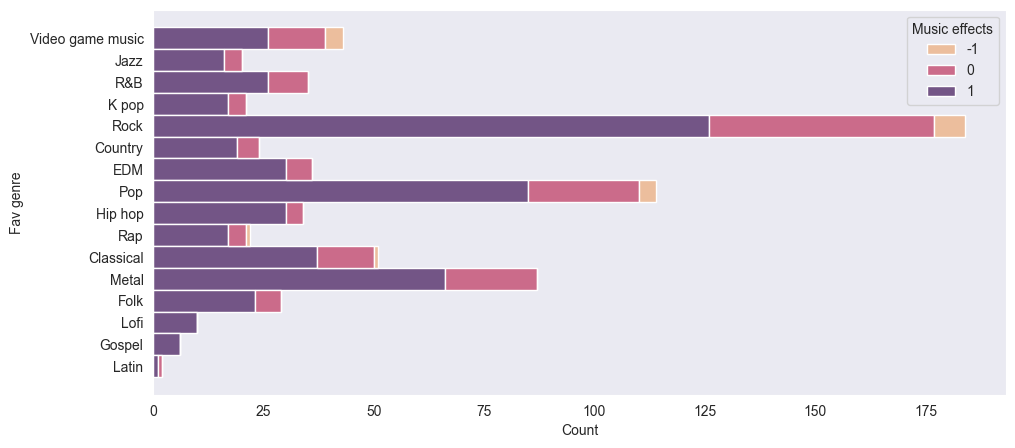

In [44]:
groups = ["Anxiety", "Depression", "Insomnia", "OCD", "Fav genre"]
for y in groups:
    plt.figure(figsize=(11,5))
    sns.histplot(df3, y=y, palette="flare", hue="Music effects", multiple="stack")
    plt.show()

Text(0.5, 1.0, 'Music Effects on Mental Health')

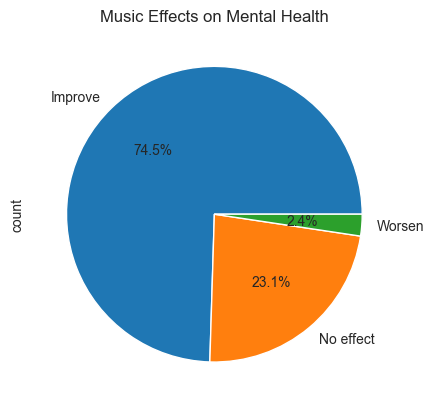

In [40]:
df["Music effects"].value_counts().plot.pie(
    autopct="%1.1f%%", colors=sns.color_palette("tab10")
)
plt.title("Music Effects on Mental Health")

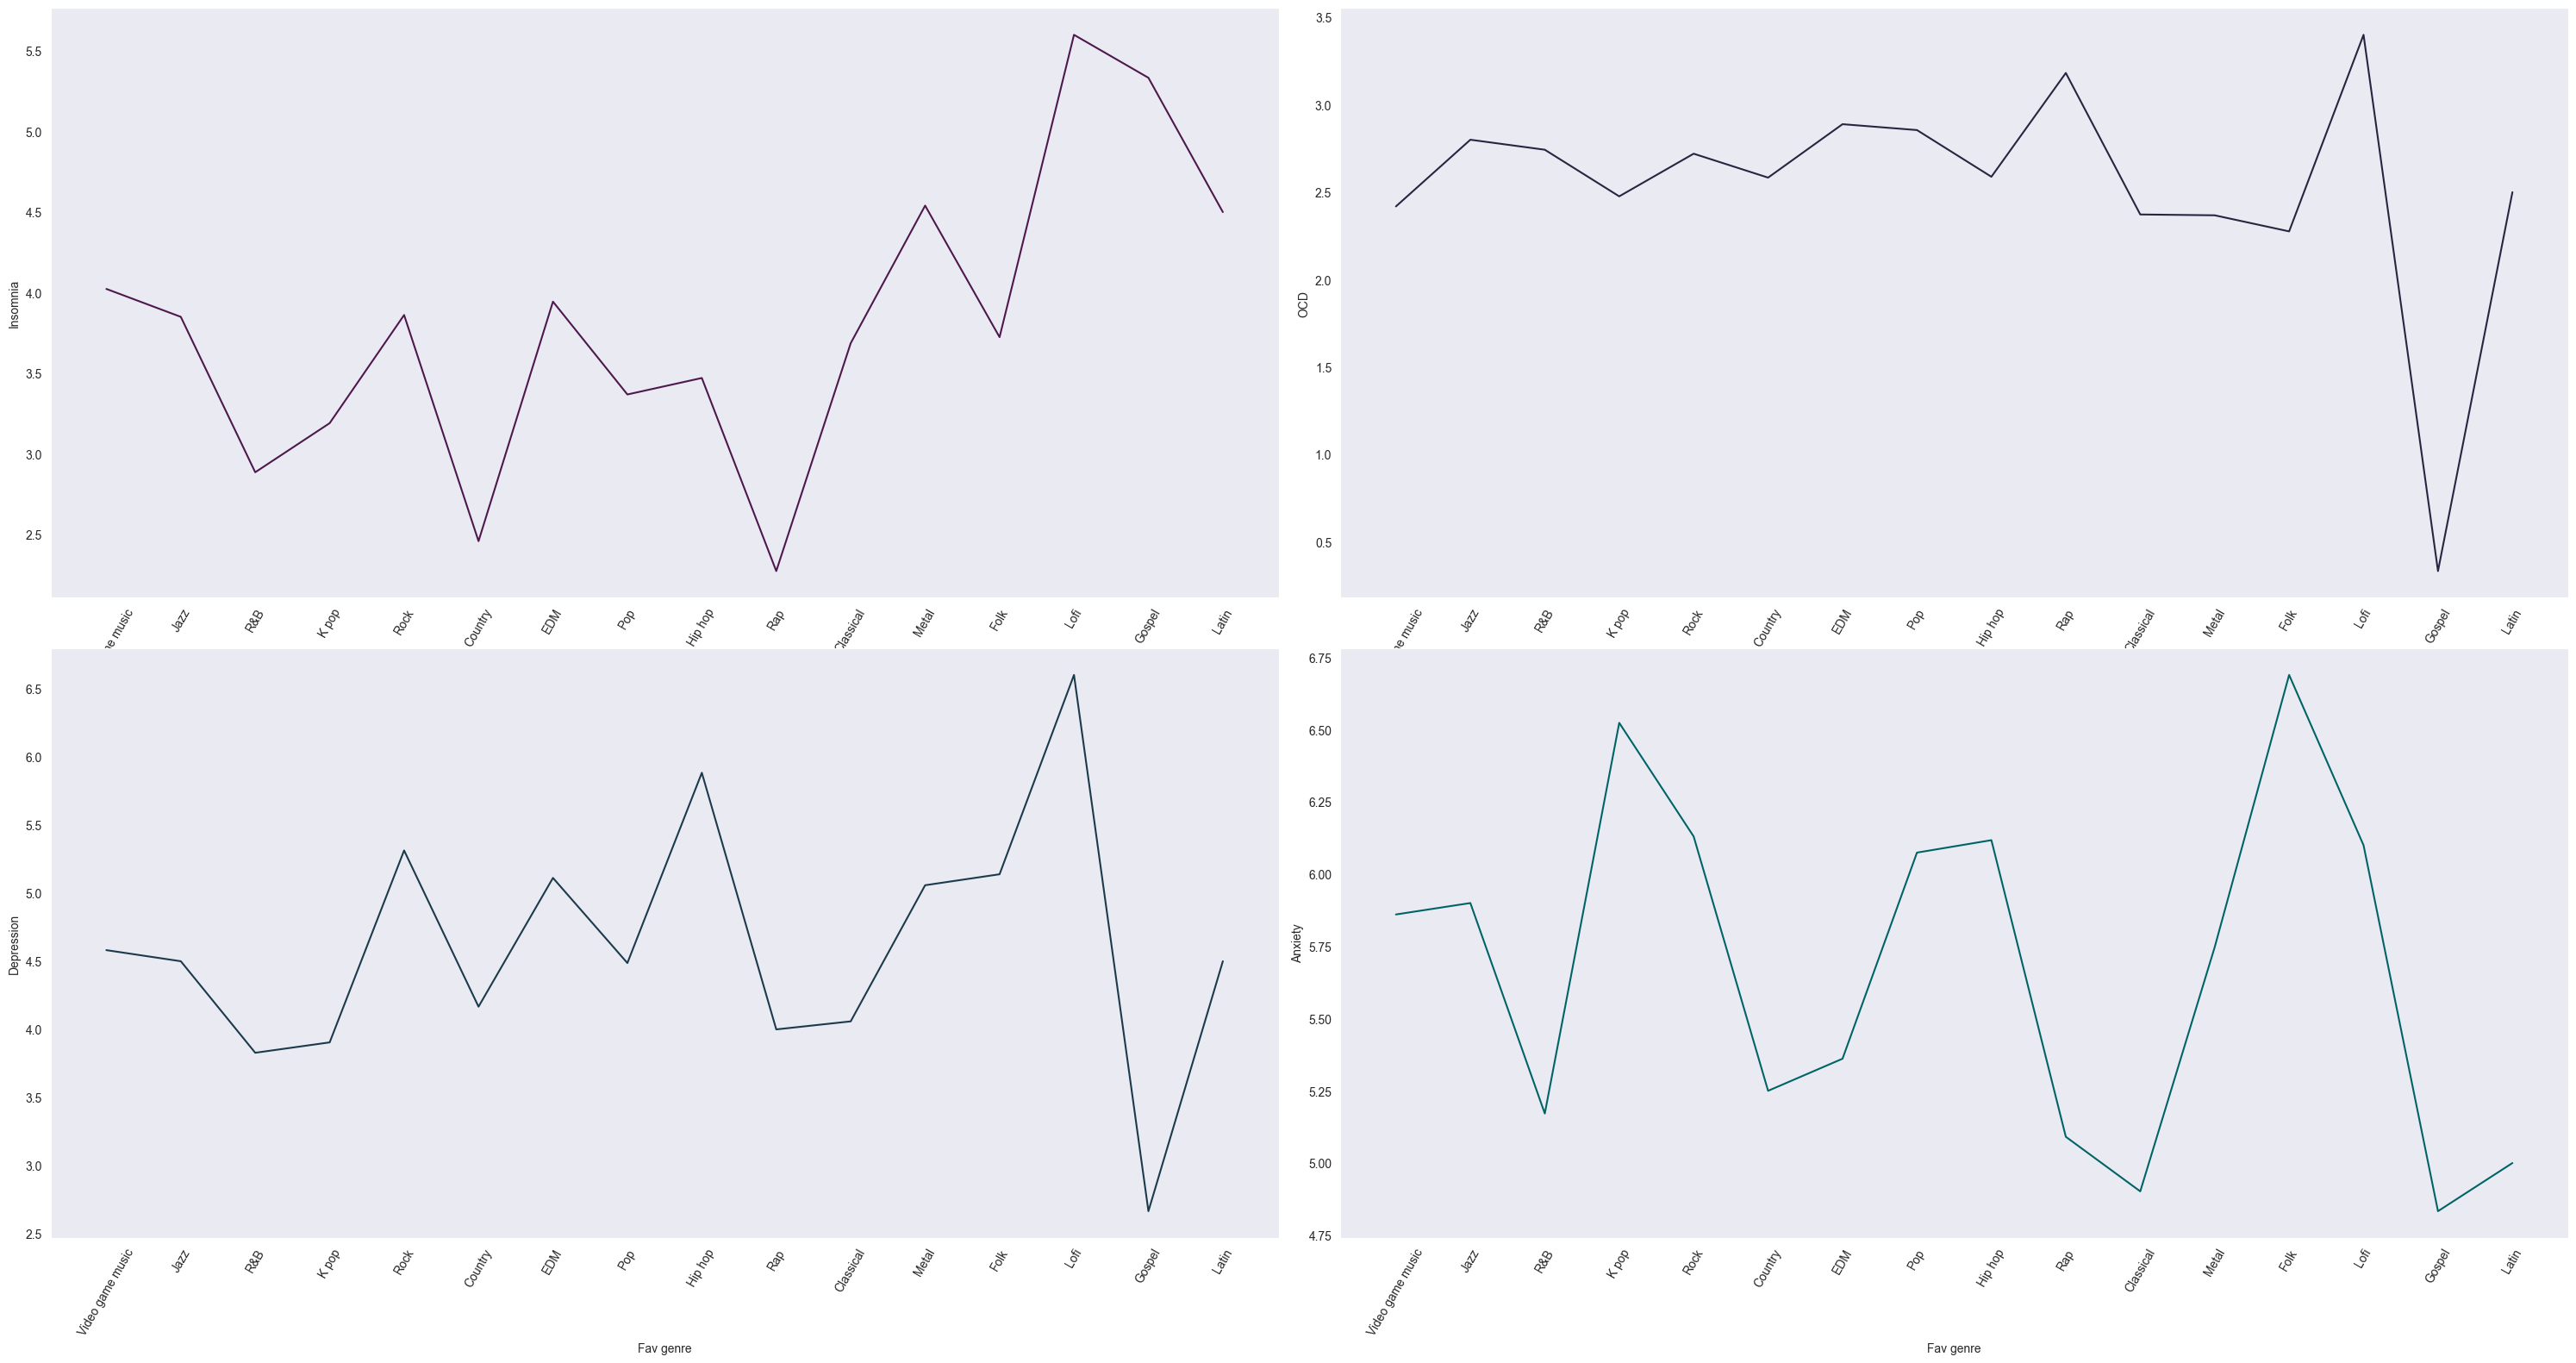

In [41]:
figure,axes=plt.subplots(2,2,figsize=(30,15))
sns.lineplot(ax=axes[0,0],x=df3['Fav genre'],y=df3['Insomnia'],ci=None,color='#4D194D')
sns.lineplot(ax=axes[0,1],x=df3['Fav genre'],y=df3['OCD'],ci=None,color='#272640')
sns.lineplot(ax=axes[1,0],x=df3['Fav genre'],y=df3['Depression'],ci=None,color='#1B3A4B')
sns.lineplot(ax=axes[1,1],x=df3['Fav genre'],y=df3['Anxiety'],ci=None,color='#006466')
plt.tight_layout()
for ax in axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
plt.show()

In [42]:
fig = px.pie(df3, names='Fav genre', title='Genre Preferences')
fig.show()